In [1]:
import pickle
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('../../../src')
import raybay

In [2]:
# Load treatment plan results
result = np.load('result', allow_pickle=True)

In [3]:
# Reload goal and function dataframes (doesn't save correctly from remote)
result.goal_df = pd.read_csv('../goals.csv') 
result.func_df = pd.read_csv('funcs.csv')
pickle.dump(result, open('result', 'wb'))

In [4]:
# Clinical goals
result.goal_df

,Roi,Type,GoalCriteria,AcceptanceLevel,ParameterValue,Notes
0,BrachialPlexus,MaxDvh,AtMost,2360,60.24,NaN
1,BrachialPlexus,MaxDose,AtMost,2720,NaN,NaN
2,BronchialTree,MaxDvh,AtMost,1560,20.26,NaN
3,BronchialTree,MaxDose,AtMost,3480,NaN,NaN
4,ChestWall,MaxDvh,AtMost,3000,1.94,NaN
5,D2cm,MaxDose,AtMost,3000,NaN,NaN
6,Esophagus,MaxDvh,AtMost,1880,19.97,NaN
7,Esophagus,MaxDose,AtMost,2500,NaN,NaN
8,GreatVessels,MaxDvh,AtMost,4300,8.74,NaN
9,GreatVessels,MaxDose,AtMost,4900,NaN,NaN


In [5]:
# Constituent functions
result.func_df

,Roi,FunctionType,DoseLevel,PercentVolume,EudParameterA,Weight
0,BrachialPlexus,MaxDvh,2360,60.24,NaN,1
1,BrachialPlexus,MaxDose,2720,0.00,NaN,1
2,BronchialTree,MaxDvh,1560,20.26,NaN,1
3,BronchialTree,MaxDose,3480,0.00,NaN,1
4,ChestWall,MaxDvh,3000,1.94,NaN,1
5,D2cm,MaxDose,3000,0.00,NaN,1
6,Esophagus,MaxDvh,1880,19.97,NaN,1
7,Esophagus,MaxDose,2500,0.00,NaN,1
8,GreatVessels,MaxDvh,4300,8.74,NaN,1
9,GreatVessels,MaxDose,4900,0.00,NaN,1


In [6]:
# Clinical goal results
compare = pd.DataFrame()
for index, row in result.goal_df.iterrows():
    roi = row['Roi']
    goal_type = row['Type']
    level = row['AcceptanceLevel']
    value = result.goal_dict[index][0]
    percent = 100*(value - level)/level
    compare = compare.append({'Roi': roi, 'Type': goal_type, 'AcceptanceLevel': level, 
                              'GoalValue': value, 'PercentChange': percent}, ignore_index=True)
compare = compare[['Roi', 'Type', 'AcceptanceLevel', 'GoalValue', 'PercentChange']] # enforce column order
compare

,Roi,Type,AcceptanceLevel,GoalValue,PercentChange
0,BrachialPlexus,MaxDvh,2360.0,1412.414487,-40.151929
1,BrachialPlexus,MaxDose,2720.0,3084.888184,13.415007
2,BronchialTree,MaxDvh,1560.0,198.479215,-87.276973
3,BronchialTree,MaxDose,3480.0,1597.015015,-54.108764
4,ChestWall,MaxDvh,3000.0,2798.317390,-6.722754
5,D2cm,MaxDose,3000.0,3429.074707,14.302490
6,Esophagus,MaxDvh,1880.0,540.277737,-71.261822
7,Esophagus,MaxDose,2500.0,2211.868408,-11.525264
8,GreatVessels,MaxDvh,4300.0,512.299513,-88.086058
9,GreatVessels,MaxDose,4900.0,1140.796021,-76.718449


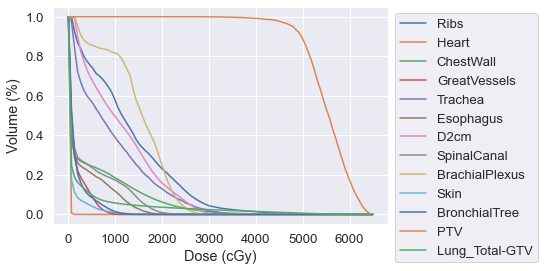

In [7]:
# Dose-volume histograms
result.dvhplot()

In [8]:
# Utility function values
lin = result.get_utility('linear')[0]
lin_quad = result.get_utility('linear_quadratic')[0]
print(f"Linear: {lin:.2f}, Linear-Quadratic: {lin_quad:.2f}")

Linear: 761.20, Linear-Quadratic: -2321.14
